# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 300

In [3]:
# loading dataset
dat = pd.read_csv('data/spambase.data',header=None)
X = dat.values[:,:-1]
y = dat.values[:,-1]

In [4]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [5]:
# optimizing square root of misclass rate
# def sqrt_mcr(y_true,y_pred):
#     return np.sqrt(1-accuracy_score(y_true,y_pred))

def mcr(y_true,y_pred):
    return 1-accuracy_score(y_true,y_pred)

# define optimizer object
opt = FCVOpt(clf,param_bounds,mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=40,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 2.835e-01 1.532e-01 9.344e-02
     1 2.759e-01 1.529e-01 9.066e-02
     2 1.596e-01 -9.823e-03 1.121e-01
     3 1.210e-01 -4.392e-02 1.105e-01
     4 9.243e-02 -3.116e-02 1.299e-01
     5 8.543e-02 -4.499e-02 1.228e-01
     6 6.338e-02 -6.135e-02 1.460e-01
     7 6.032e-02 1.021e-03 1.278e-01
     8 7.742e-02 -4.675e-03 1.375e-01
     9 7.300e-02 9.406e-03 1.294e-01
  iter    f_best   acq_best    sigma_f
    10 7.136e-02 9.595e-03 1.436e-01
    11 7.349e-02 1.095e-02 1.424e-01
    12 5.989e-02 2.503e-02 1.255e-01
    13 5.948e-02 3.028e-02 1.295e-01
    14 5.859e-02 3.867e-02 1.231e-01
    15 5.932e-02 4.462e-02 1.415e-01
    16 5.912e-02 4.765e-02 1.358e-01
    17 6.190e-02 5.182e-02 1.300e-01
    18 6.261e-02 4.902e-02 1.431e-01
    19 6.368e-02 4.963e-02 1.537e-01
  iter    f_best   acq_best    sigma_f
    20 6.313e-02 5.183e-02 1.389e-01
    21 6.329e-02 5.335e-02 1.324e-01
    22 6.328e-02 5.389e-02 1.425e-01
    23 6.262e-02 5.375e-02

{'x_best': array([4.64511816e+01, 4.29193335e-03]),
 'f_best': 0.06030915621407644,
 'acq_cand': 0.05630575493641961,
 'x_cand': array([2.84794938e+01, 3.27166322e-03])}

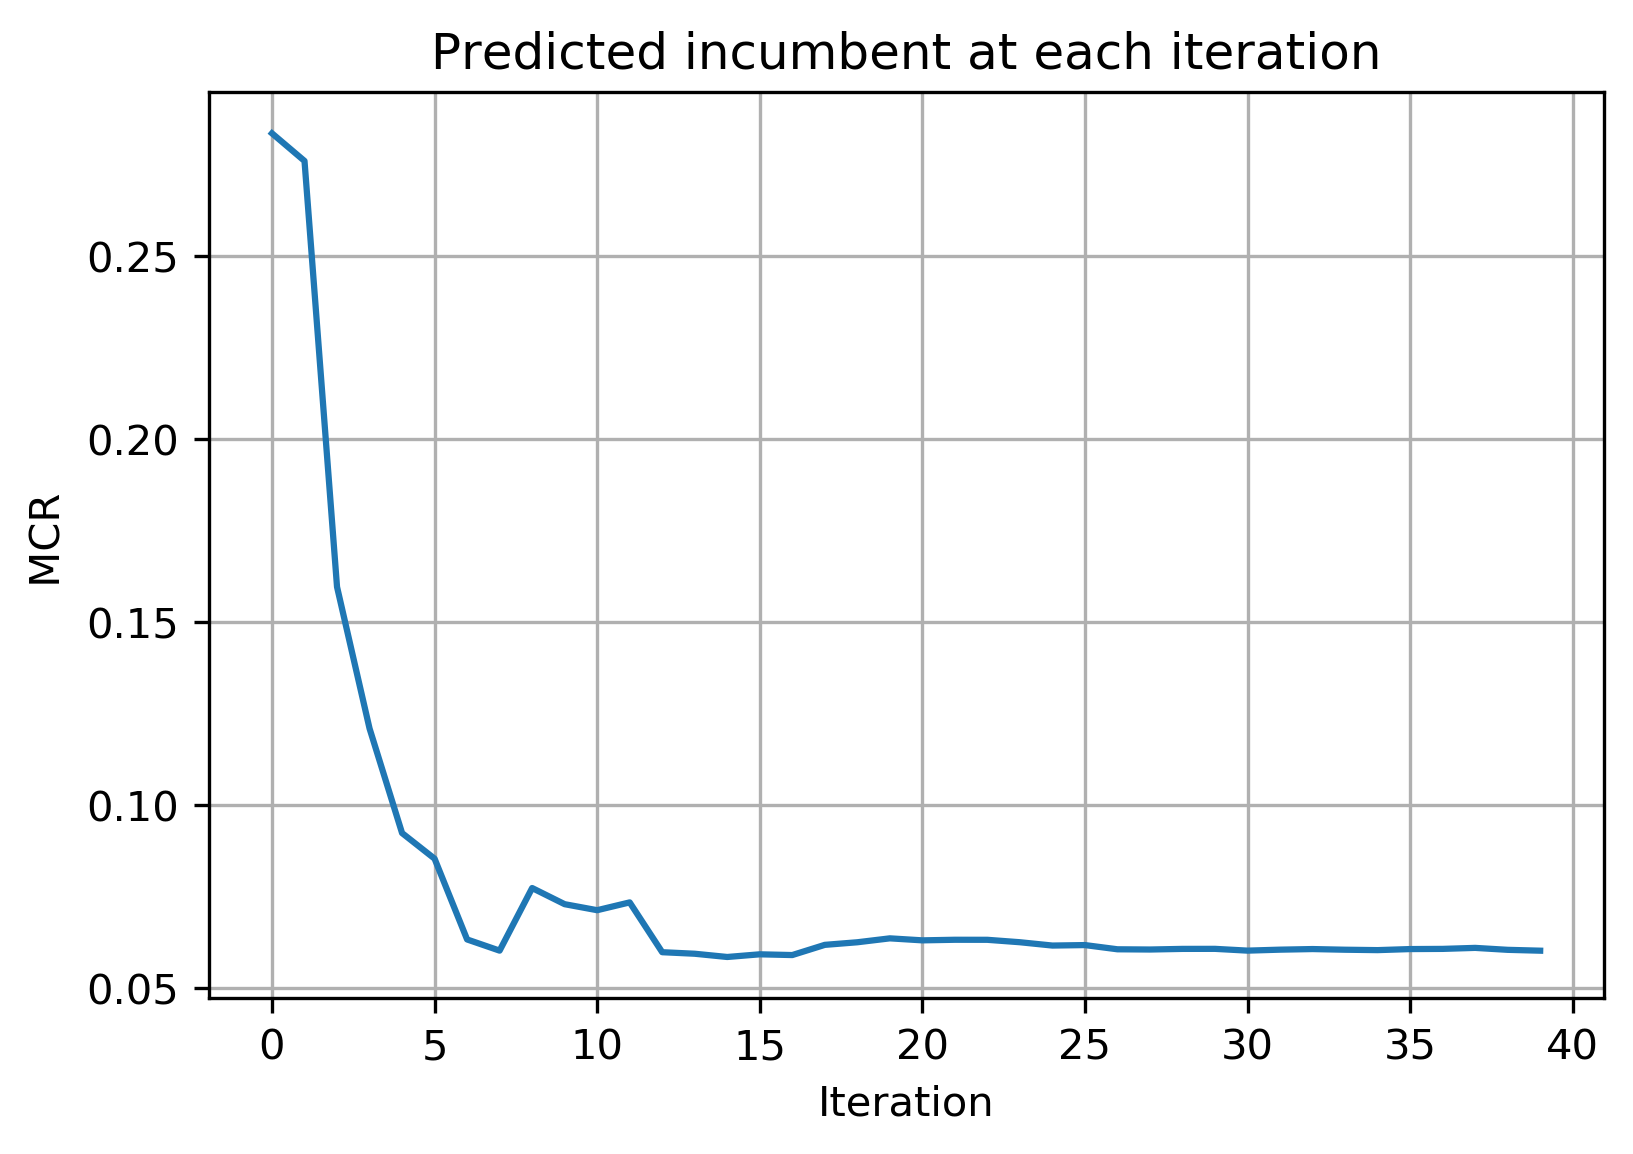

In [6]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel(' MCR')
plt.title('Predicted incumbent at each iteration')
plt.grid()
plt.show()

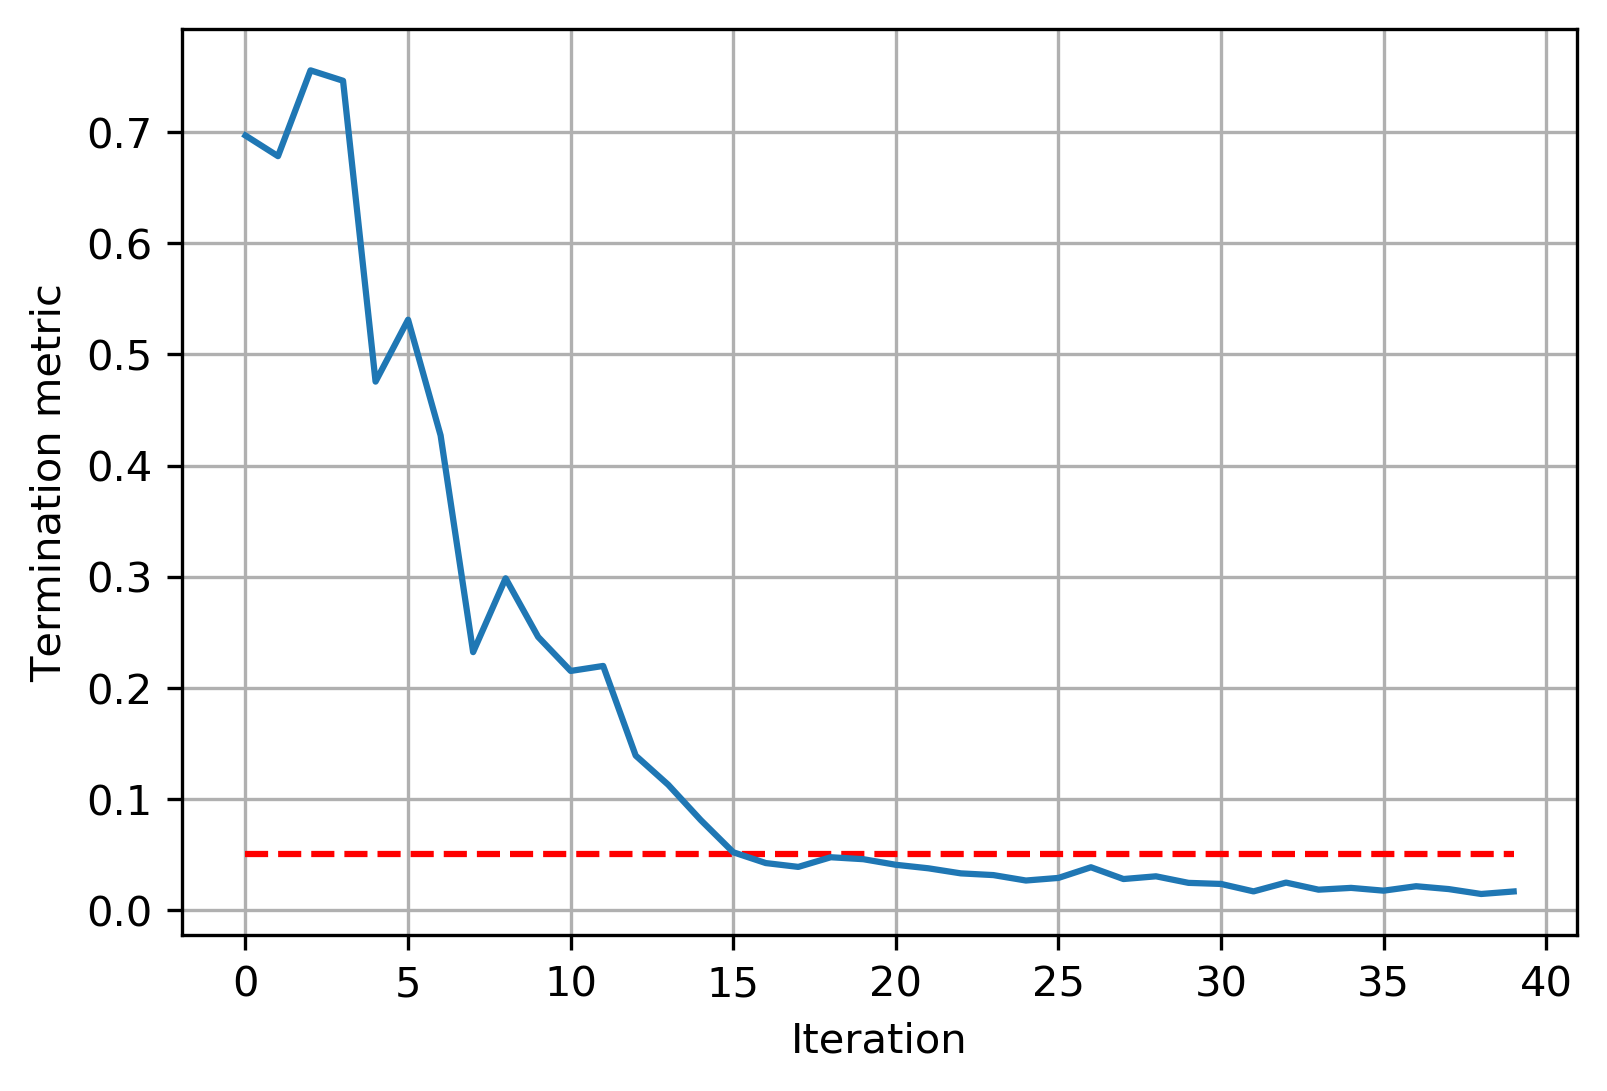

In [7]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.grid()
plt.show()

In [8]:
opt.total_time/60

4.400636279582978

In [9]:
opt.mcmc_time

array([5.94529271, 2.87231898, 2.96610689, 3.41686797, 3.46876383,
       3.51660132, 3.62032199, 3.91656733, 3.76589441, 3.95439243,
       3.98730564, 3.94648647, 4.25758481, 4.20376396, 4.27154756,
       4.27553511, 4.07510805, 4.20971131, 4.35133243, 4.66748786,
       4.65356231, 4.83441663, 4.41406655, 4.61965084, 6.5164187 ,
       7.97060704, 4.85103345, 4.93684363, 5.18517542, 4.66053987,
       4.99761057, 4.92084599, 4.95471478, 5.45442009, 5.15621758,
       5.51821303, 5.46741509, 5.32077718, 5.30079532, 5.41848254])

In [10]:
opt.acq_time

array([0.91455555, 0.88563085, 1.0700984 , 1.5648191 , 1.01528597,
       1.06215978, 0.57645941, 0.82180357, 1.58975077, 1.15092349,
       1.11797762, 1.36232305, 1.45415115, 1.236696  , 0.96645617,
       1.73037505, 1.10301375, 1.30152297, 1.21076536, 1.53892636,
       1.12100506, 1.17189074, 1.62166548, 1.20478129, 1.8430748 ,
       1.37232947, 1.29856753, 1.54683113, 1.44808555, 0.85970354,
       1.46712065, 1.15494871, 1.42519259, 1.29158235, 1.35841012,
       1.40029716, 1.50900722, 1.98074293, 2.4414742 , 1.49101329])

In [11]:
tmp = np.array([ 11.46004844,   5.87520313,   6.16731548,   6.36224294,
         6.55139875,  65.11575246,  73.66377974,  80.84621716,
        96.04897618, 104.89603019, 121.03515887, 132.78689647,
       141.99558163, 158.67195845, 164.42131591, 171.94490218,
       183.80386209, 195.0721066 , 224.18213034, 229.8870542 ,
       238.83026028, 261.1075027 , 255.5533421 , 245.37488794,
       239.23262286, 253.6841557 , 263.17726445, 263.93328118,
       260.4735918 , 267.7193656 , 256.57303572, 263.21083236,
       265.26953745, 263.84525943, 277.91349292, 284.83006763,
       284.03420377, 287.80204034, 289.93777275, 298.53637433])

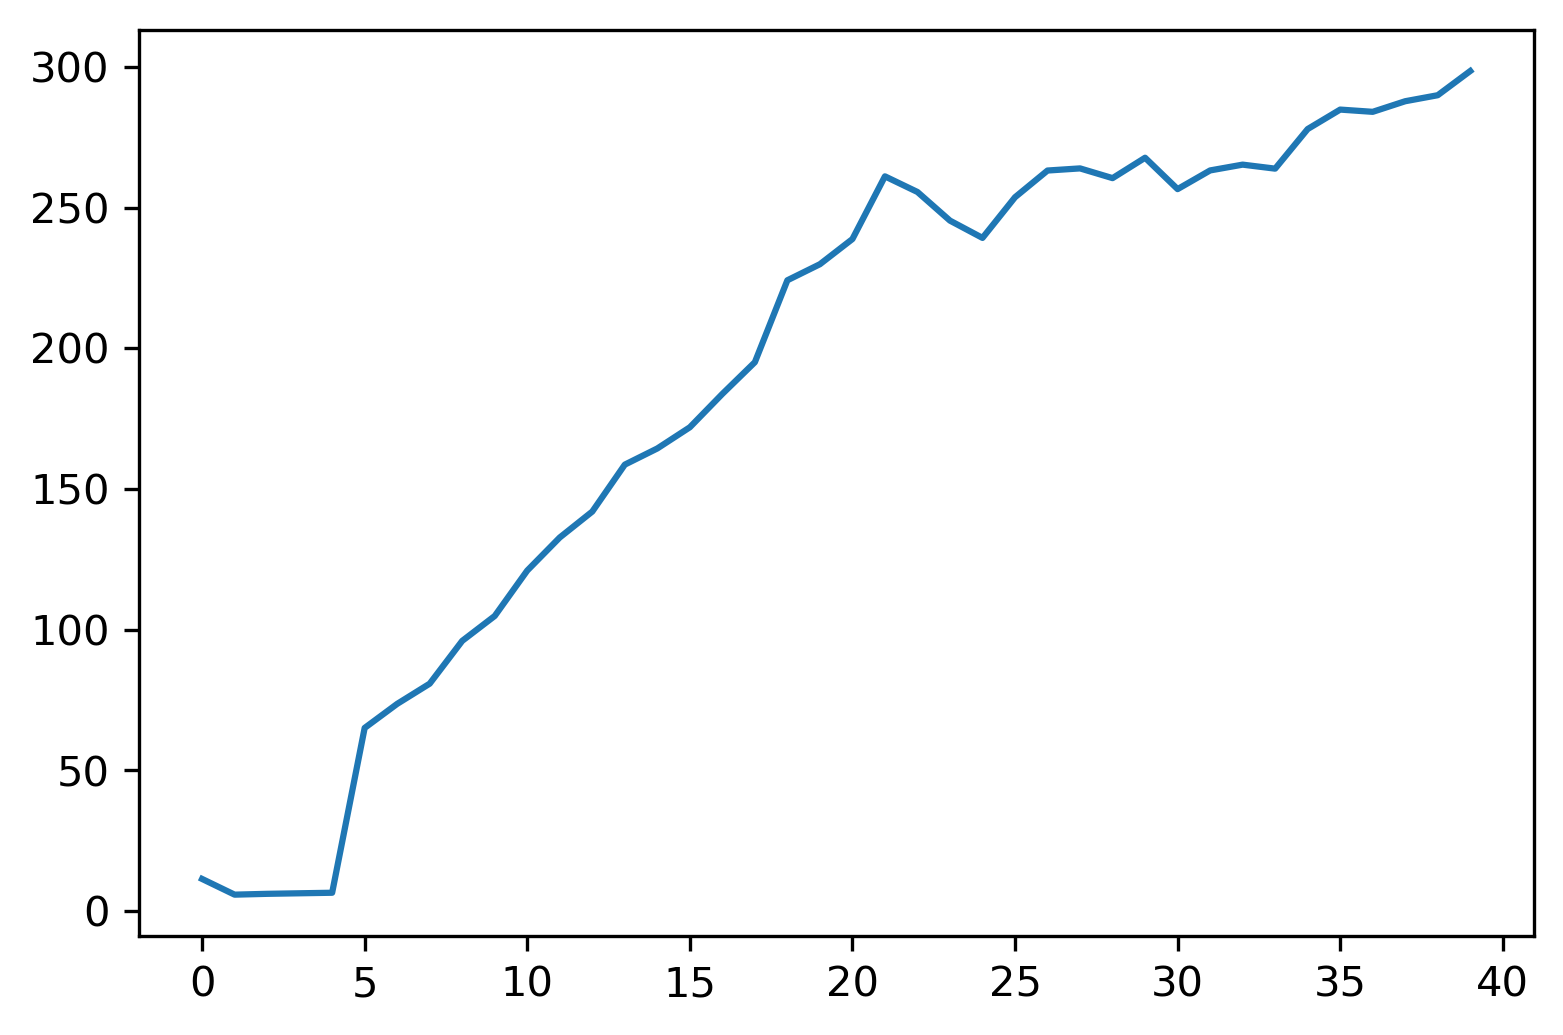

In [12]:
plt.plot(tmp)

In [13]:
A = np.ones((3,3))
B = np.ones((3,2))

np.cross(B,B)

array([0., 0., 0.])

In [14]:
np.einsum('ji,jk->ik',B,B)

array([[3., 3.],
       [3., 3.]])

In [15]:
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [16]:
A = np.ones((3,3))


In [17]:
np.einsum('ij,jk,kl->il',A,A,A)

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])